In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

import pandas as pd
import pickle

# pd.set_option('display.max_columns', None) # To see the max columns without truncation
# pd.set_option('display.max_rows', None) # To see the max rows without truncation

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go

In [65]:
df = pd.read_csv('data/CompleteDataset.csv')

In [66]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

         RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0      61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1      57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2      59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3      64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
17976   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17977   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17978  31.0  28.0  38.0  29.0  45.0  42.0  45.0  44.0  32.0  45.0  
17979  47.0  46.0  45.0  47.0  43.0  45.0  41.0  44.0  46.0  41.0  
17980  40.0  45.0  30.0  38.0  29.0  30.0  31.0  29.0  38.0  31.0  

[17981 rows x 75 columns]

In [67]:
df.shape

(17981, 75)

In [68]:
df.head(5).T

0  \
Unnamed: 0                                                0   
Name                                      Cristiano Ronaldo   
Age                                                      32   
Photo        https://cdn.sofifa.org/48/18/players/20801.png   
Nationality                                        Portugal   
...                                                     ...   
RM                                                     89.0   
RS                                                     92.0   
RW                                                     91.0   
RWB                                                    66.0   
ST                                                     92.0   

                                                           1  \
Unnamed: 0                                                 1   
Name                                                L. Messi   
Age                                                       30   
Photo        https://cdn.sofifa.org/48/18/players/158023.png   
Nationality                                        Argentina   
...                                                      ...   
RM                                                      90.0   
RS                                                      88.0   
RW                                                      91.0   
RWB                                                     62.0   
ST                                                      88.0   

                                                           2  \
Unnamed: 0                                                 2   
Name                                                  Neymar   
Age                                                       25   
Photo        https://cdn.sofifa.org/48/18/players/190871.png   
Nationality                                           Brazil   
...                                                      ...   
RM                                                      87.0   
RS                                                      84.0   
RW                                                      89.0   
RWB                                                     64.0   
ST                                                      84.0   

                                                           3  \
Unnamed: 0                                                 3   
Name                                               L. Suárez   
Age                                                       30   
Photo        https://cdn.sofifa.org/48/18/players/176580.png   
Nationality                                          Uruguay   
...                                                      ...   
RM                                                      85.0   
RS                                                      88.0   
RW                                                      87.0   
RWB                                                     68.0   
ST                                                      88.0   

                                                           4  
Unnamed: 0                                                 4  
Name                                                M. Neuer  
Age                                                       31  
Photo        https://cdn.sofifa.org/48/18/players/167495.png  
Nationality                                          Germany  
...                                                      ...  
RM                                                       NaN  
RS                                                       NaN  
RW                                                       NaN  
RWB                                                      NaN  
ST                                                       NaN  

[75 rows x 5 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  int64  
 14  Aggression           17981 non-null  int64  
 15  Agility              17981 non-null 

In [70]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1, inplace=True)

### Drop NA values and Duplications

In [71]:
df.isnull().sum()


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
               ... 
RM             2029
RS             2029
RW             2029
RWB            2029
ST             2029
Length: 71, dtype: int64

In [72]:
df.duplicated().sum()

52

In [73]:
df.dropna()

Name  Age Nationality  Overall  Potential  \
0      Cristiano Ronaldo   32    Portugal       94         94   
1               L. Messi   30   Argentina       93         93   
2                 Neymar   25      Brazil       92         94   
3              L. Suárez   30     Uruguay       92         92   
5         R. Lewandowski   28      Poland       91         91   
...                  ...  ...         ...      ...        ...   
17974          J. Keeble   18     England       46         56   
17975       T. Käßemodel   28     Germany       46         46   
17978           J. Young   17    Scotland       46         61   
17979       J. Lundstram   18     England       46         64   
17980          L. Sackey   18       Ghana       46         64   

                      Club   Value   Wage  Special  Acceleration  ...    RB  \
0           Real Madrid CF  €95.5M  €565K     2228            89  ...  61.0   
1             FC Barcelona   €105M  €565K     2154            92  ...  57.0   
2      Paris Saint-Germain   €123M  €280K     2100            94  ...  59.0   
3             FC Barcelona    €97M  €510K     2291            88  ...  64.0   
5         FC Bayern Munich    €92M  €355K     2143            79  ...  58.0   
...                    ...     ...    ...      ...           ...  ...   ...   
17974         Grimsby Town    €40K    €1K     1105            66  ...  46.0   
17975    FC Erzgebirge Aue    €30K    €1K     1174            25  ...  37.0   
17978         Swindon Town    €60K    €1K     1194            66  ...  31.0   
17979      Crewe Alexandra    €60K    €1K     1302            57  ...  47.0   
17980    Scunthorpe United    €50K    €1K     1031            48  ...  40.0   

        RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0      53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1      45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2      46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3      58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
5      57.0  78.0  62.0  87.0  82.0  88.0  84.0  61.0  88.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
17974  45.0  34.0  41.0  33.0  35.0  33.0  34.0  44.0  33.0  
17975  38.0  45.0  42.0  42.0  42.0  41.0  41.0  38.0  41.0  
17978  28.0  38.0  29.0  45.0  42.0  45.0  44.0  32.0  45.0  
17979  46.0  45.0  47.0  43.0  45.0  41.0  44.0  46.0  41.0  
17980  45.0  30.0  38.0  29.0  30.0  31.0  29.0  38.0  31.0  

[15746 rows x 71 columns]

## Data analysis

### Number of countries available and top 5 countries with have highest number of players


In [74]:
print('Total number of countries : {}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(10))
print('-'*80)


Total number of countries : 165
England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------


### Reflection on the map of players by country

In [75]:
nt = df['Nationality'].value_counts()
iplot([
    go.Choropleth(
        locationmode = 'country names',
        locations=nt.index.values,
        text=nt.index,
        z=nt.values,
        colorscale='Jet'
    )
])

### Total number of clubs present and top 10 clubs with highest number of players


In [76]:
print('Total number of clubs : {}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(10))

Total number of clubs : 647
Villarreal CF         35
OGC Nice              34
Borussia Dortmund     34
VfL Wolfsburg         34
FC Nantes             34
UD Las Palmas         34
Olympique Lyonnais    34
Manchester United     34
Manchester City       33
Arsenal               33
Name: Club, dtype: int64


### Player with highest potential and overall performance


In [77]:
print('Highest potential score player :'+ str(df.loc[df['Potential'].idxmax()][0]))
print('Maximum Overall Performance : '+str(df.loc[df['Overall'].idxmax()][0]))


Highest potential score player :Cristiano Ronaldo
Maximum Overall Performance : Cristiano Ronaldo


### Change the data of the attributes from object to int for applying idx max function

In [78]:
df['Acceleration'] = pd.to_numeric(df['Acceleration'])
df['Aggression'] = pd.to_numeric(df['Aggression'])
df['Agility'] = pd.to_numeric(df['Agility'])
df['Balance'] = pd.to_numeric(df['Balance'])
df['Ball control'] = pd.to_numeric(df['Ball control'])
df['Composure'] = pd.to_numeric(df['Composure'])
df['Crossing'] = pd.to_numeric(df['Crossing'])
df['Curve'] = pd.to_numeric(df['Curve'])
df['Dribbling'] = pd.to_numeric(df['Dribbling'])
df['Finishing'] = pd.to_numeric(df['Finishing'])
df['Free kick accuracy'] = pd.to_numeric(df['Free kick accuracy'])
df['GK diving'] = pd.to_numeric(df['GK diving'])
df['GK handling'] = pd.to_numeric(df['GK handling'])
df['GK kicking'] = pd.to_numeric(df['GK kicking'])
df['GK positioning'] = pd.to_numeric(df['GK positioning'])
df['GK reflexes'] = pd.to_numeric(df['GK reflexes'])
df['Heading accuracy'] = pd.to_numeric(df['Heading accuracy'])
df['Interceptions'] = pd.to_numeric(df['Interceptions'])
df['Jumping'] = pd.to_numeric(df['Jumping'])
df['Long passing'] = pd.to_numeric(df['Long passing'])
df['Long shots'] = pd.to_numeric(df['Long shots'])
df['Marking'] = pd.to_numeric(df['Marking'])
df['Penalties'] = pd.to_numeric(df['Penalties'])
df['Positioning'] = pd.to_numeric(df['Positioning'])
df['Reactions'] = pd.to_numeric(df['Reactions'])
df['Short passing'] = pd.to_numeric(df['Short passing'])
df['Shot power'] = pd.to_numeric(df['Shot power'])
df['Sliding tackle'] = pd.to_numeric(df['Sliding tackle'])
df['Sprint speed'] = pd.to_numeric(df['Sprint speed'])
df['Stamina'] = pd.to_numeric(df['Stamina'])
df['Standing tackle'] = pd.to_numeric(df['Standing tackle'])
df['Strength'] = pd.to_numeric(df['Strength'])
df['Vision'] = pd.to_numeric(df['Vision'])
df['Volleys'] = pd.to_numeric(df['Volleys'])



In [79]:
df.dtypes['Acceleration']

dtype('int64')

### Best in different aspects:

In [80]:
pr_cols=['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots',
       'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys',]
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][0]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Acceleration : Douglas Costa
Best Aggression : B. Brereton
Best Agility : Neymar
Best Balance : Bernard
Best Ball control : L. Messi
Best Composure : E. Mammana
Best Crossing : S. Tigges
Best Curve : Quaresma
Best Dribbling : L. Messi
Best Finishing : L. Messi
Best Free kick accuracy : A. Gomes
Best GK diving : M. Neuer
Best GK handling : T. Courtois
Best GK kicking : M. Neuer
Best GK positioning : M. Neuer
Best GK reflexes : De Gea
Best Heading accuracy : Aduriz
Best Interceptions : A. Barzagli
Best Jumping : Cristiano Ronaldo
Best Long passing : T. Kroos
Best Long shots : Cristiano Ronaldo
Best Marking : G. Chiellini
Best Penalties : M. Balotelli
Best Positioning : Cristiano Ronaldo
Best Reactions : Cristiano Ronaldo
Best Short passing : L. Modrić
Best Shot power : L. Dunk
Best Sliding tackle : M. Diouf
Best Sprint speed : M. Palienko
Best Stamina : D. Yearwood
Best Standing tackle : M. Diouf
Best Strength : A. Akinfenwa
Be

In [81]:
# Interpret the value attribute
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value *= 1000000
        elif suffix == 'K':
            value *= 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)
        

In [82]:
df.head().T

0          1       2          3         4
Name         Cristiano Ronaldo   L. Messi  Neymar  L. Suárez  M. Neuer
Age                         32         30      25         30        31
Nationality           Portugal  Argentina  Brazil    Uruguay   Germany
Overall                     94         93      92         92        92
Potential                   94         93      94         92        92
...                        ...        ...     ...        ...       ...
RM                        89.0       90.0    87.0       85.0       NaN
RS                        92.0       88.0    84.0       88.0       NaN
RW                        91.0       91.0    89.0       87.0       NaN
RWB                       66.0       62.0    64.0       68.0       NaN
ST                        92.0       88.0    84.0       88.0       NaN

[71 rows x 5 columns]

### Top 10 most valuable players

In [83]:
top_valued = df.nlargest(10, 'Value')
print(top_valued)

                 Name  Age Nationality  Overall  Potential  \
2              Neymar   25      Brazil       92         94   
1            L. Messi   30   Argentina       93         93   
3           L. Suárez   30     Uruguay       92         92   
0   Cristiano Ronaldo   32    Portugal       94         94   
5      R. Lewandowski   28      Poland       91         91   
7           E. Hazard   26     Belgium       90         91   
11       K. De Bruyne   26     Belgium       89         92   
8            T. Kroos   27     Germany       90         90   
19          P. Dybala   23   Argentina       88         93   
9          G. Higuaín   29   Argentina       90         90   

                   Club        Value      Wage  Special  Acceleration  ...  \
2   Paris Saint-Germain  123000000.0  280000.0     2100            94  ...   
1          FC Barcelona  105000000.0  565000.0     2154            92  ...   
3          FC Barcelona   97000000.0  510000.0     2291            88  ...   
0    

### Summary
1. Neymar: €123M 
2. L. Messi: €105M 
3. L. Suárez: €97M 
4. Cristiano Ronaldo: €95.5M 
5. R. Lewandowski: €92M 
6. E. Hazard: €90.5M 
7. K. De Bruyne €83M 
8. T. Kroos: €79M 
9. P. Dybala €79M 
10. G. Higuaín €79M 

### Top 10 most earning players

In [84]:
top_earners = df.nlargest(10, 'Wage')
print(top_earners)

                 Name  Age Nationality  Overall  Potential              Club  \
0   Cristiano Ronaldo   32    Portugal       94         94    Real Madrid CF   
1            L. Messi   30   Argentina       93         93      FC Barcelona   
3           L. Suárez   30     Uruguay       92         92      FC Barcelona   
15            G. Bale   27       Wales       89         89    Real Madrid CF   
5      R. Lewandowski   28      Poland       91         91  FC Bayern Munich   
8            T. Kroos   27     Germany       90         90    Real Madrid CF   
14          L. Modrić   31     Croatia       89         89    Real Madrid CF   
16          S. Agüero   29   Argentina       89         89   Manchester City   
10       Sergio Ramos   31       Spain       90         90    Real Madrid CF   
7           E. Hazard   26     Belgium       90         91           Chelsea   

          Value      Wage  Special  Acceleration  ...    RB   RCB   RCM   RDM  \
0    95500000.0  565000.0     2228    

### Summary
1. Cristiano Ronaldo: €565K
2. L. Messi: €565K
3. L. Suárez: €510K
4. G. Bale: €370K
5. R. Lewandowski: €355K
6. T. Kroos: €340K
7. L. Modrić: €340K
8. S. Agüero: €325K
9. Sergio Ramos: €310K
10. E. Hazard: €295K


### Highest rated players

In [86]:
player_info = df[['Name','Club','Overall']]
# Remove row with missing overall ratings
player_info = player_info.dropna(subset=['Overall'])

# Find the club with the highest average rating
club_avg_ratings = player_info.groupby('Club')['Overall'].mean().reset_index()
top_club = club_avg_ratings.loc[club_avg_ratings['Overall'].idxmax()]

# Get the players in the highest-rated club
highest_rated_team_players = player_info[ player_info['Club'] == top_club['Club']]

# Sort the players by their individual overall ratings within the club
highest_rated_team_players = highest_rated_team_players.sort_values(by='Overall', ascending=False)

# Display the highest-rated team and its players 
print(f"Highest rated club : {top_club['Club']}")
print()
print('Highest rated team players: ')
for index, player in highest_rated_team_players.iterrows():
    print(f"{player['Name']} - Overall Rating: {player['Overall']}")

Highest rated club : FC Barcelona

Highest rated team players: 
L. Messi - Overall Rating: 93
L. Suárez - Overall Rating: 92
I. Rakitić - Overall Rating: 87
Piqué - Overall Rating: 87
Iniesta - Overall Rating: 87
Sergio Busquets - Overall Rating: 86
M. ter Stegen - Overall Rating: 85
Jordi Alba - Overall Rating: 85
O. Dembélé - Overall Rating: 83
S. Umtiti - Overall Rating: 83
J. Mascherano - Overall Rating: 83
A. Turan - Overall Rating: 82
Deulofeu - Overall Rating: 82
André Gomes - Overall Rating: 82
Nélson Semedo - Overall Rating: 81
Rafinha - Overall Rating: 81
J. Cillessen - Overall Rating: 81
Sergi Roberto - Overall Rating: 81
Paulinho - Overall Rating: 81
Denis Suárez - Overall Rating: 80
L. Digne - Overall Rating: 79
Paco Alcácer - Overall Rating: 79
T. Vermaelen - Overall Rating: 78
Aleix Vidal - Overall Rating: 76
Adrián Ortolá - Overall Rating: 70


### Age Outliers

In [87]:
player_info = df[['Name','Age','Overall']]
# Remove rows with missing overall ratings or ages
player_info = player_info.dropna(subset=['Age','Overall'])
# Compute the IQR (Interquartile Range) for age and overall ratings
Q1_age = player_info['Age'].quantile(.25)
Q3_age = player_info['Age'].quantile(.75)
IQR_age = Q3_age - Q1_age

Q1_rating = player_info['Overall'].quantile(0.25)
Q3_rating = player_info['Overall'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

# Define the boundaries for outliers
age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

rating_lower_bound = Q1_rating - 1.5 * IQR_rating
rating_upper_bound = Q3_rating + 1.5 * IQR_rating

# Find outliers for age and rating
age_outliers = player_info[ (player_info['Age'] < age_lower_bound) | (player_info['Age'] > age_upper_bound)]
rating_outliers = player_info[ (player_info['Overall'] < rating_lower_bound) | (player_info['Overall'] > rating_upper_bound)]

print('Rating outliers: ')
print(rating_outliers)

print('\nAge outliers: ')
print(age_outliers)


Rating outliers: 
                    Name  Age  Overall
0      Cristiano Ronaldo   32       94
1               L. Messi   30       93
2                 Neymar   25       92
3              L. Suárez   30       92
4               M. Neuer   31       92
...                  ...  ...      ...
17976          A. Kelsey   17       46
17977      B. Richardson   47       46
17978           J. Young   17       46
17979       J. Lundstram   18       46
17980          L. Sackey   18       46

[139 rows x 3 columns]

Age outliers: 
                Name  Age  Overall
18         G. Buffon   39       89
853           Hilton   39       78
1408      M. Storari   40       76
1688     A. Bizzarri   39       75
2224        B. Nivet   40       74
3148       T. Simons   40       73
3309      M. Candelo   40       72
4078    A. Lucarelli   39       71
4308      S. Bertoli   39       71
4356     S. Nakamura   39       71
4839        O. Pérez   44       71
4905        A. Şahin   39       70
5314    E. El Hadar

## Exploratory Data Analysis

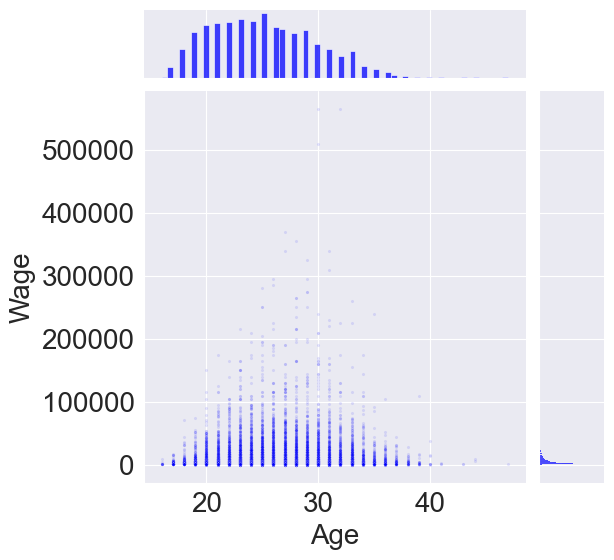

In [88]:
sns.jointplot(x=df['Age'], y=df['Wage'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'blue'},
              )

### Over or Under Mean Wage/Value

In [89]:
dfm = df.copy()

In [90]:
mean_value = dfm['Value'].mean()
mean_wage = dfm['Wage'].mean()

def overValue(x, limit):
    if x > limit:
        return 1 
    else: 
        return 0
    
dfm['Value'] = dfm['Value'].apply(lambda x:overValue(x, mean_value))
dfm['Wage'] = dfm['Wage'].apply(lambda x:overValue(x, mean_wage))



In [91]:
print('Mean value of player in FIFA 18 is around: €' + str(round(mean_value)) + '.')


Mean value of player in FIFA 18 is around: €2385390.


In [92]:
players_value = dfm.groupby('Value').size().reset_index(name='NumberOfPlayers')

In [93]:
players_value

Value  NumberOfPlayers
0      0            13805
1      1             4176

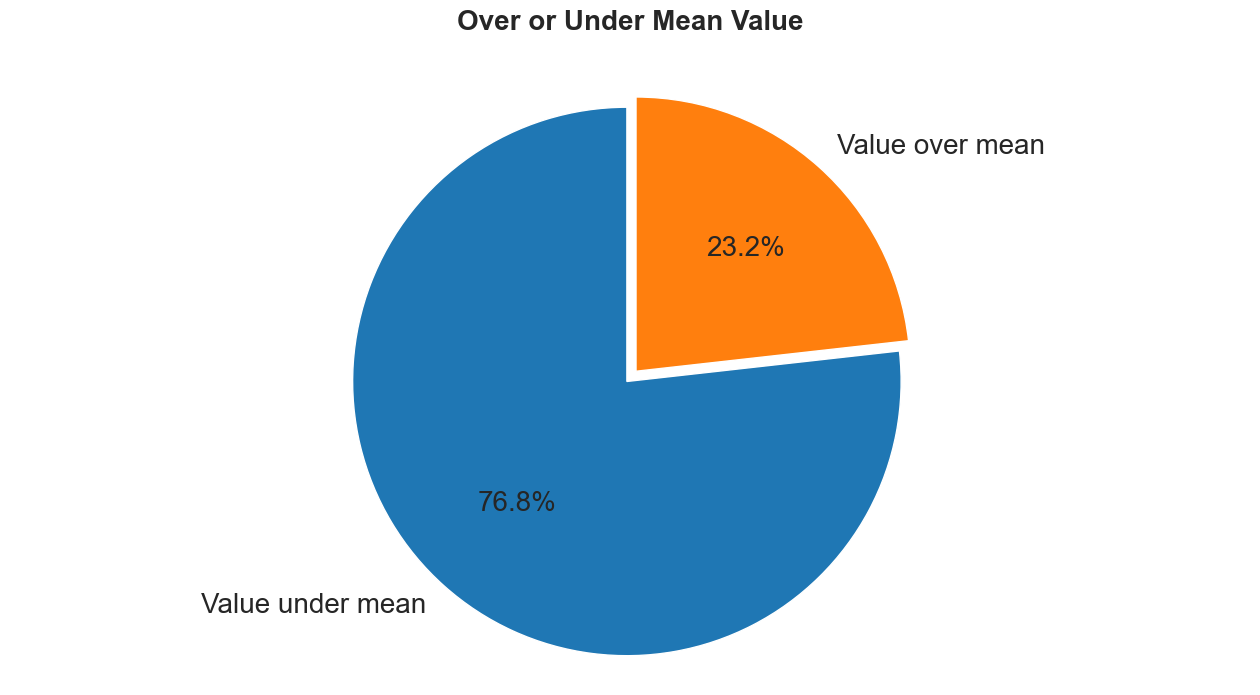

In [94]:
plt.figure( figsize=(16,8) )
plt.title('Over or Under Mean Value', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Value under mean', 'Value over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_value["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [95]:
players_wage = dfm.groupby("Wage").size().reset_index(name='NumberOfPlayers')


In [96]:
print('Mean wage of player in FIFA 18 is around: €' + str(round(mean_wage, -3)) + '.')


Mean wage of player in FIFA 18 is around: €12000.0.


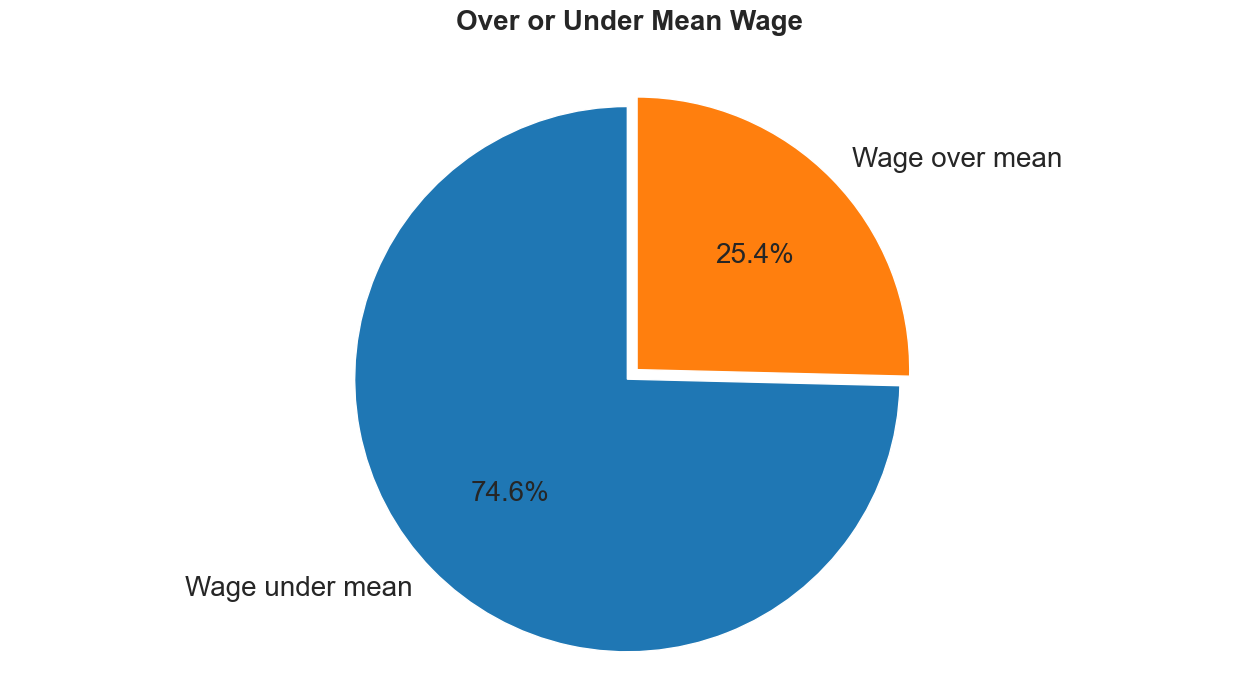

In [97]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Wage', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Wage under mean', 'Wage over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_wage["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

### Club Rates of the Top 100 Players with Pie Plot

In [98]:
d_frame = df.iloc[:100,:]
donut = d_frame.Club.value_counts()
labels = d_frame.Club.value_counts().index

#Creat figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Club rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

### Nationality Rates of the Top 100 Players with Pie Plot

In [99]:
donut = d_frame.Nationality.value_counts()
labels = d_frame.Nationality.value_counts().index

fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Nationality rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

### Value Distribution

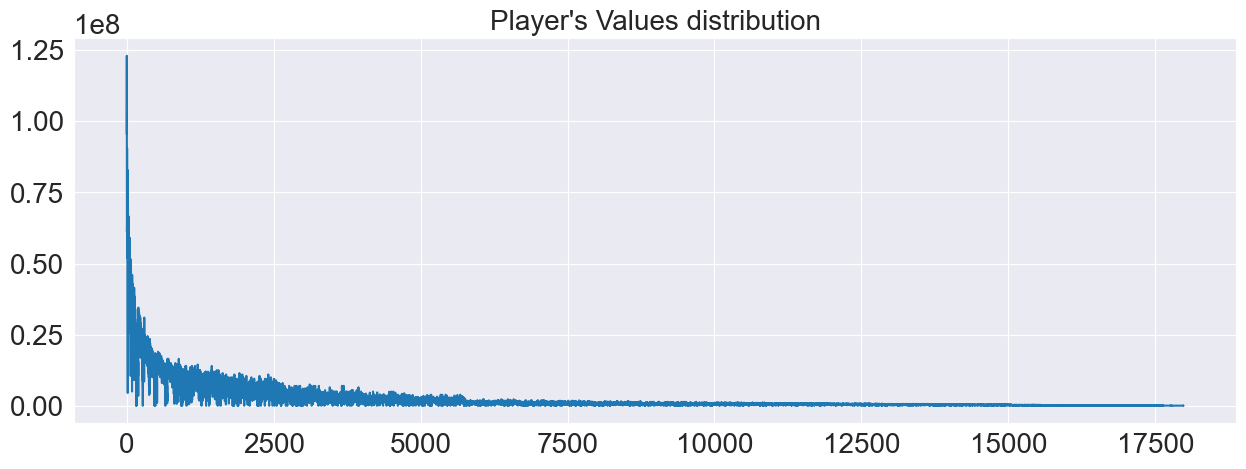

In [100]:
plt.rcParams['figure.figsize'] = (15, 5)
df['Value'].plot(kind='line')
plt.title("Player's Values distribution", fontsize = 20)
plt.show()


### Age vs Strength attribute correlation

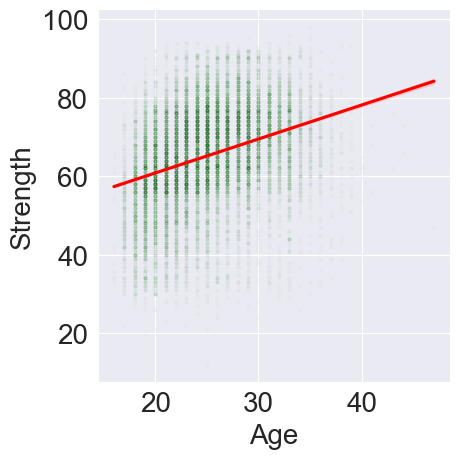

In [101]:
sns.lmplot(data = df, x = 'Age', y = 'Strength',scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

### Dribbing vs Ball Control correlation

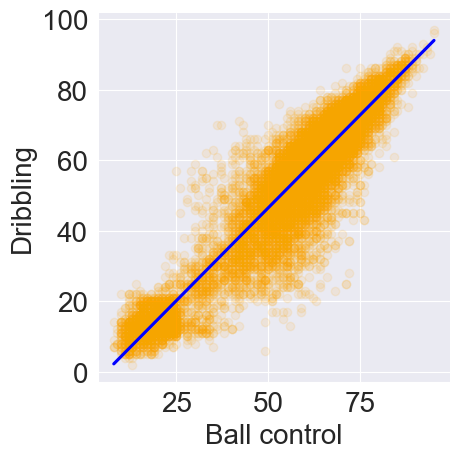

In [102]:
sns.lmplot(x='Ball control', y='Dribbling',data=df,scatter_kws={'alpha':0.1,'color':'orange'},
           line_kws={'color':'blue'})

### Crossing vs Dribbling

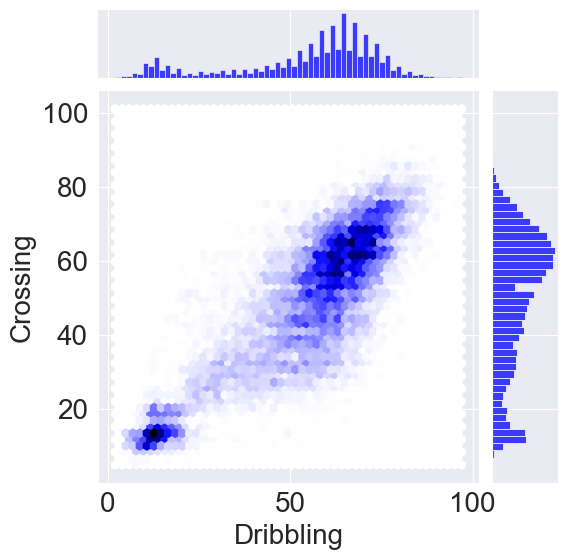

In [103]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind='hex', color='blue')

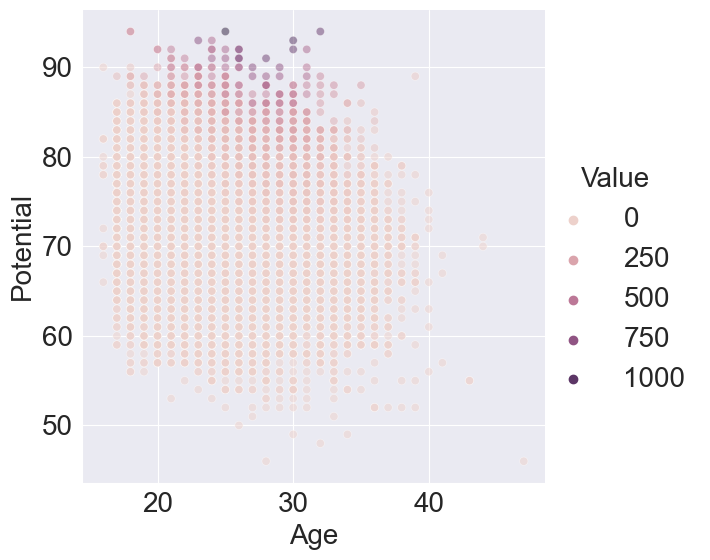

In [104]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(x='Age', y='Potential', hue=value/100000,
           sizes=(40,400), alpha=.5,
           height=6, data=df)


### Compute pairwise correlations
[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)


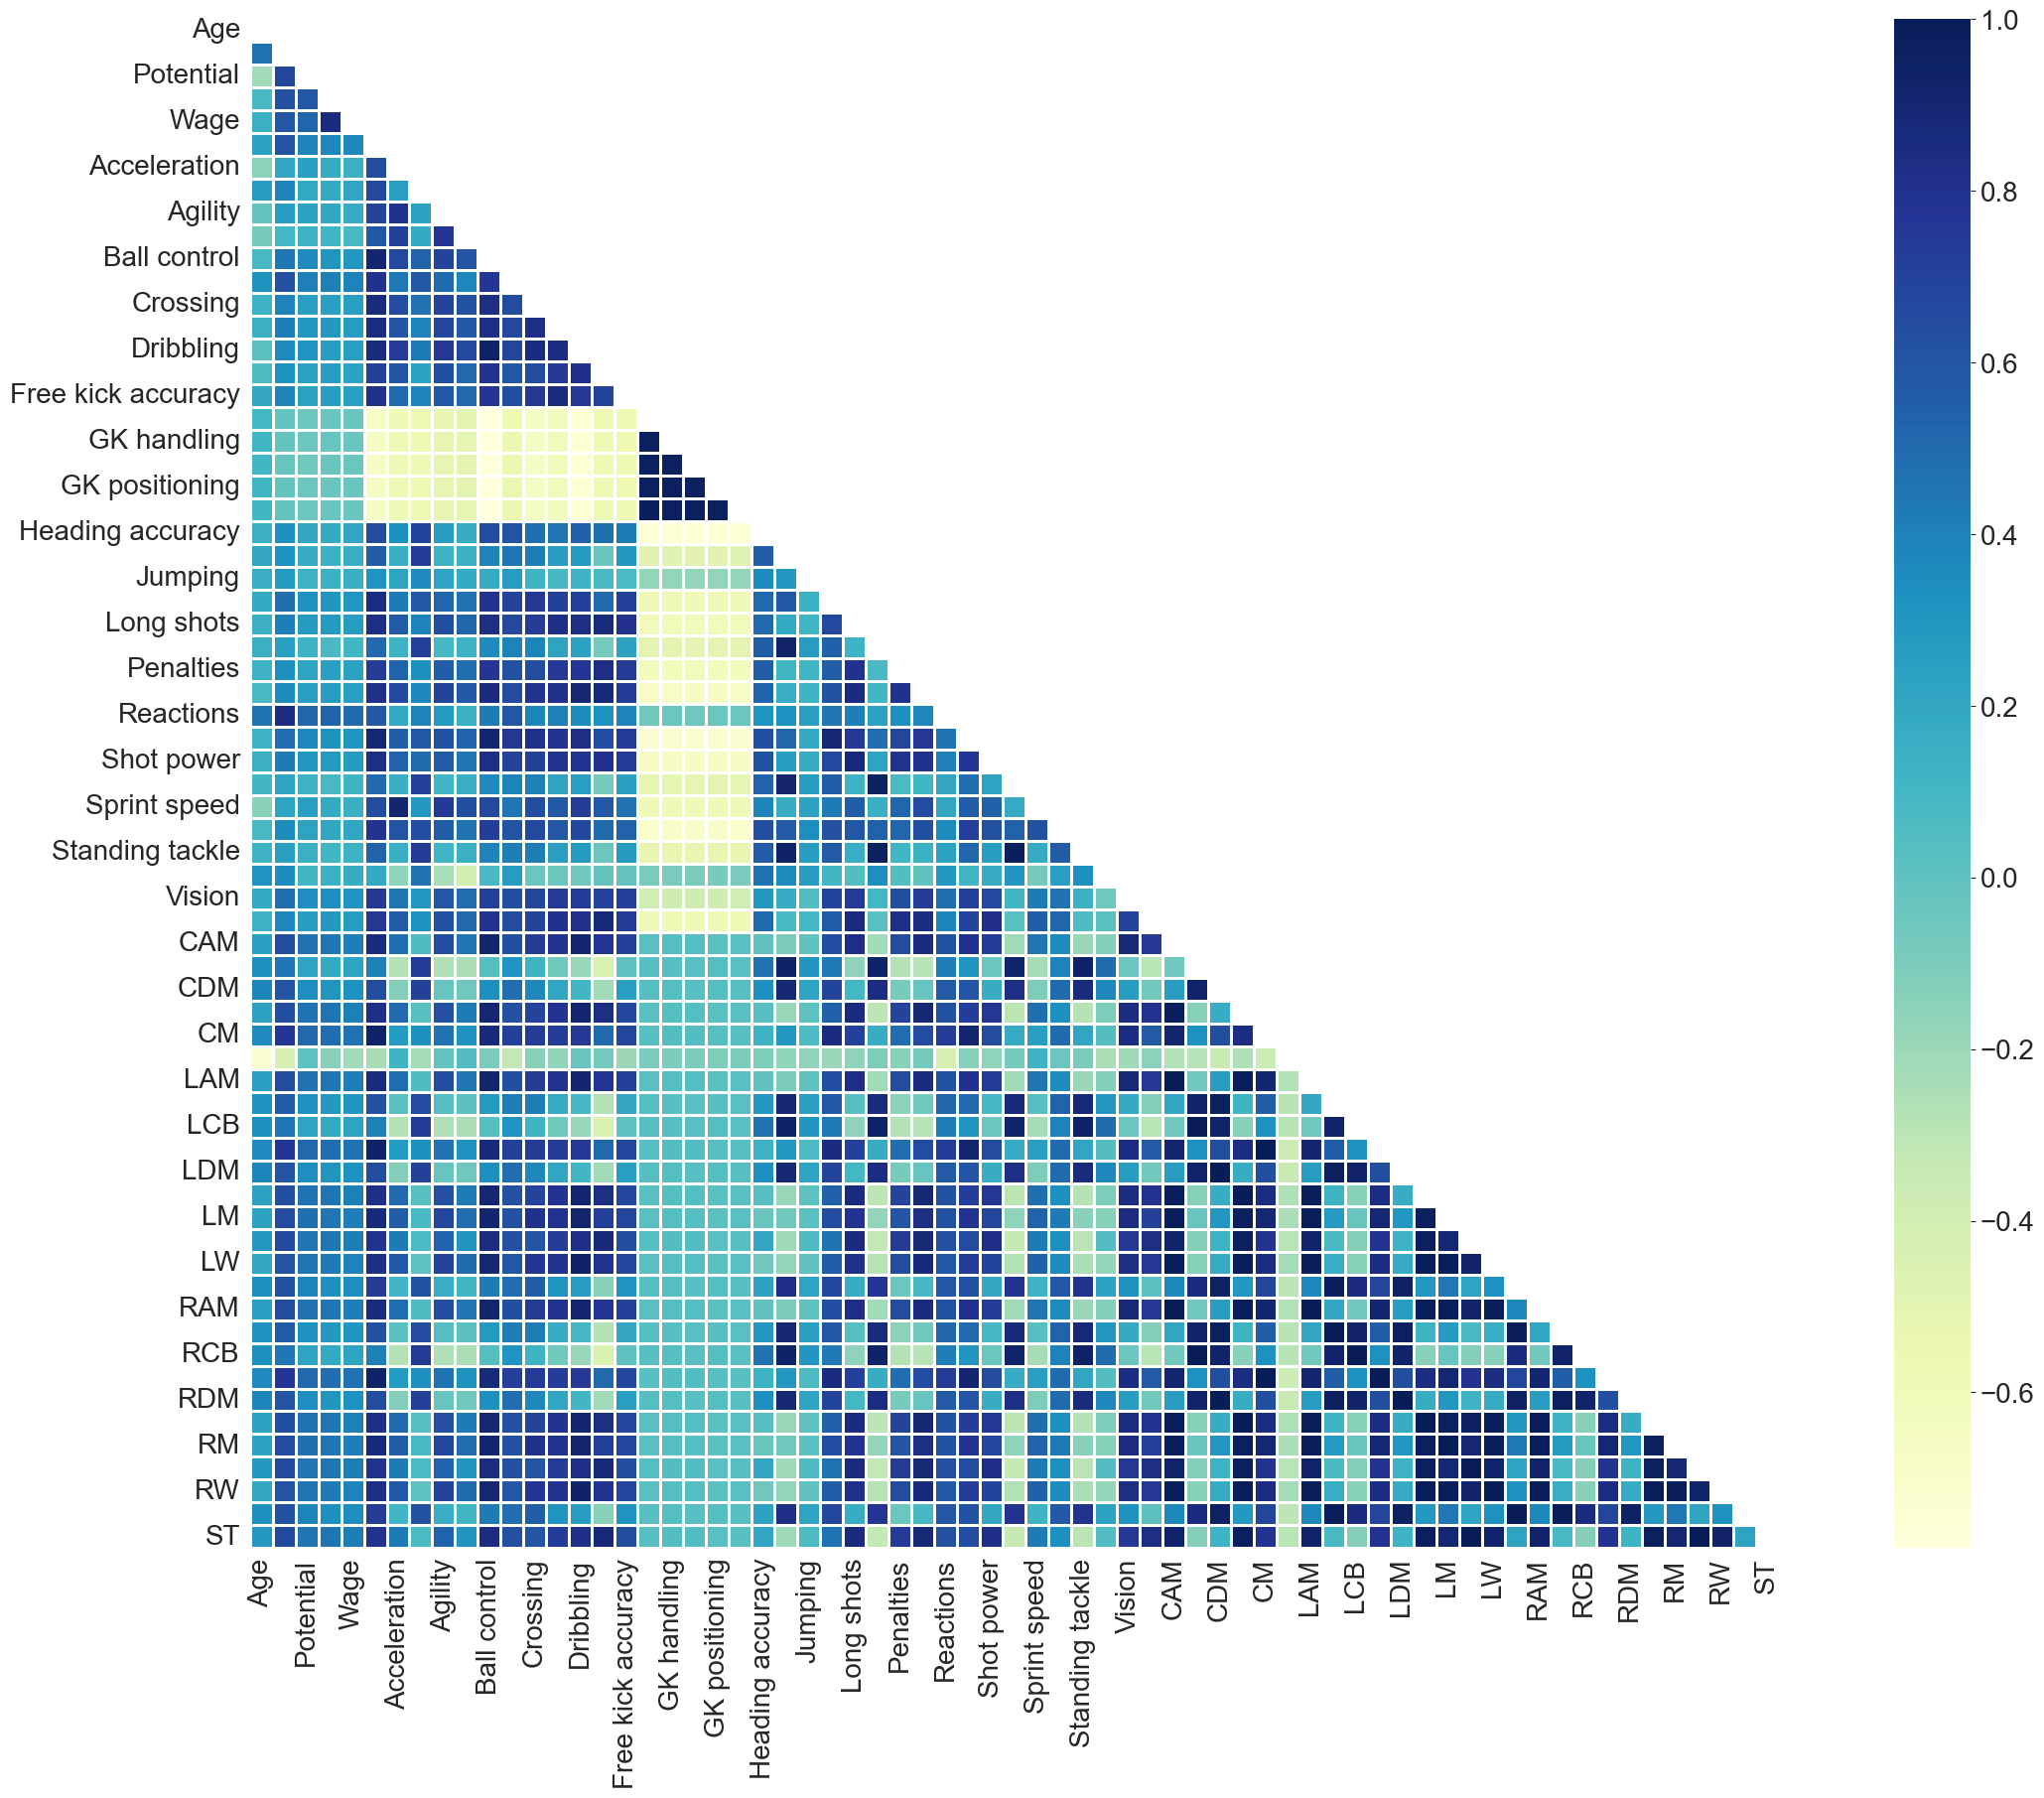

In [105]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(30,20))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap='YlGnBu',annot=False)

In [106]:
cols =['Age','Overall','Potential','Acceleration','Agility','Sprint speed','Stamina','Strength']
df_small = df[cols]

In [107]:
df_small.head()

Age  Overall  Potential  Acceleration  Agility  Sprint speed  Stamina  \
0   32       94         94            89       89            91       92   
1   30       93         93            92       90            87       73   
2   25       92         94            94       96            90       78   
3   30       92         92            88       86            77       89   
4   31       92         92            58       52            61       44   

   Strength  
0        80  
1        59  
2        53  
3        80  
4        83

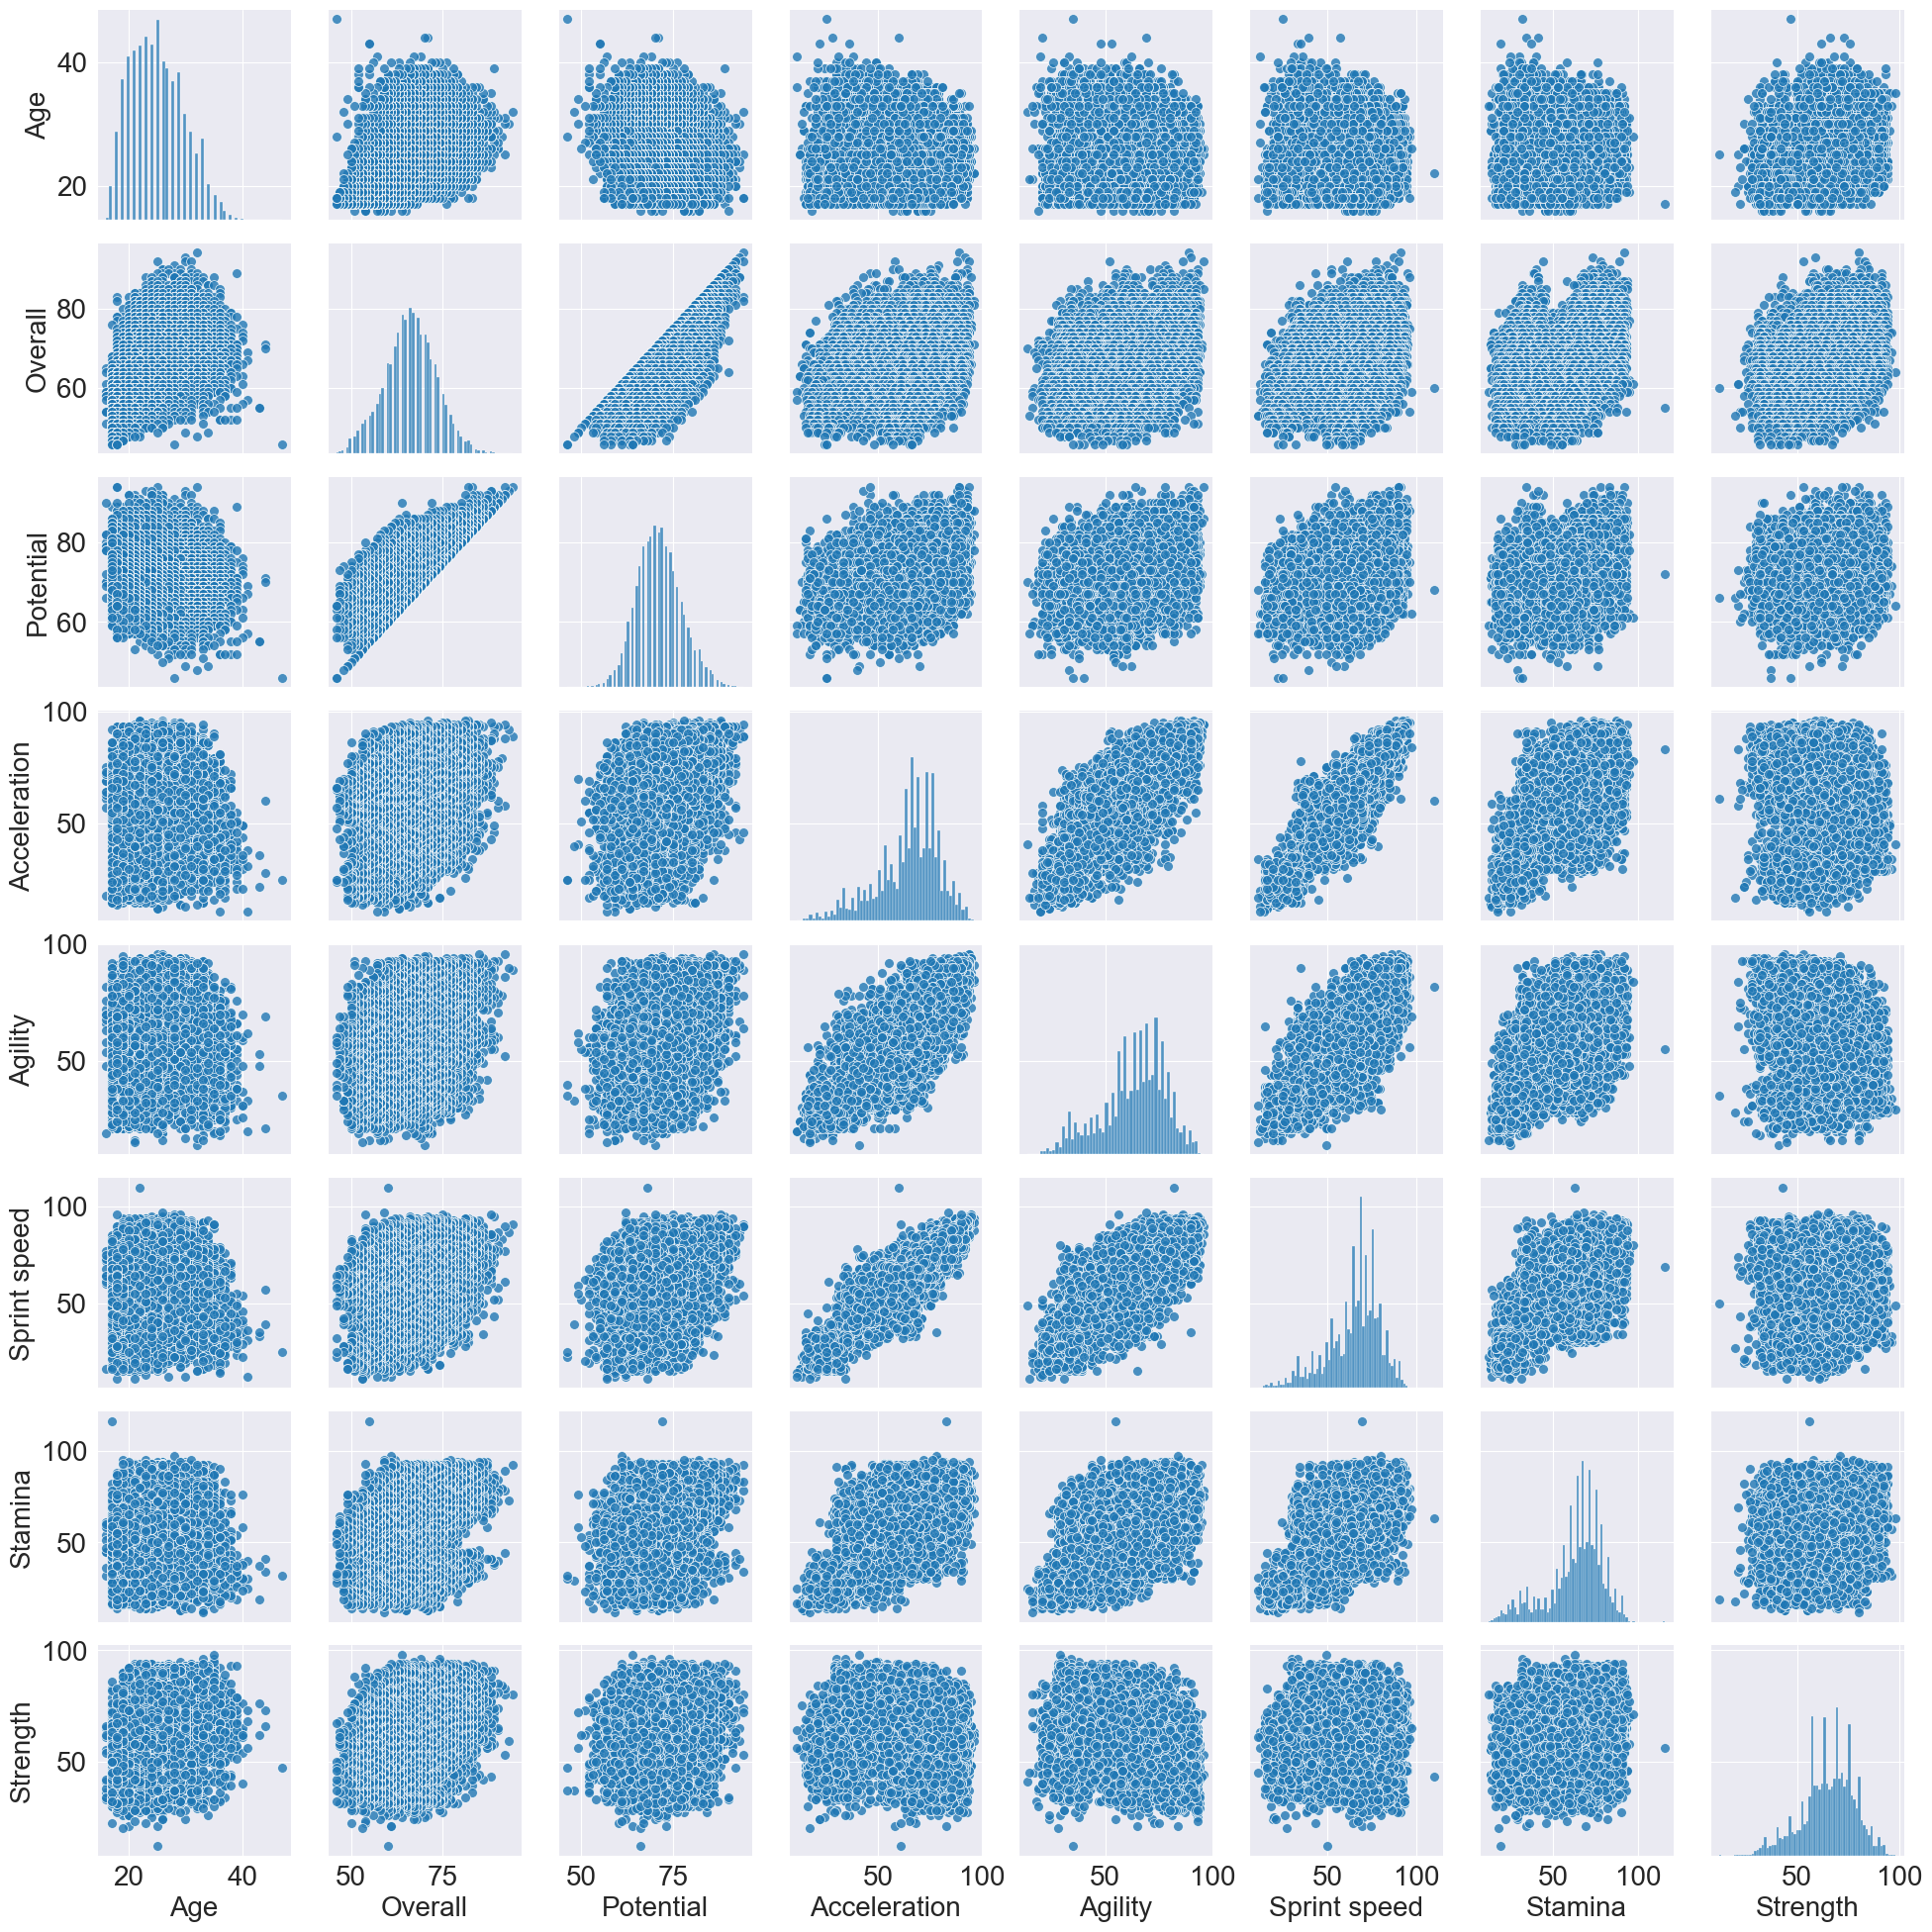

In [108]:
sns.pairplot(df_small, palette=['black','red'], plot_kws=dict(s=50, alpha=0.8), markers=['^','v'])

### From the results we can infer many things
+ Acceleration and SprintSpeed follow a proper linear relationship
+ Agility vs SprintSpeed, Agility vs Acceleration  have somewhat linear relationship


## Modeling

In [109]:
df = pd.read_csv('data/CompleteDataset.csv')

In [110]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

         RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0      61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1      57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2      59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3      64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
17976   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17977   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17978  31.0  28.0  38.0  29.0  45.0  42.0  45.0  44.0  32.0  45.0  
17979  47.0  46.0  45.0  47.0  43.0  45.0  41.0  44.0  46.0  41.0  
17980  40.0  45.0  30.0  38.0  29.0  30.0  31.0  29.0  38.0  31.0  

[17981 rows x 75 columns]

### Drop unnecessary attributes (columns)

In [111]:
drop_cols = df.columns[47:75]
df = df.drop(drop_cols, axis=1)

In [112]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

      Reactions Short passing  Shot power  Sliding tackle  Sprint speed  \
0            96            83          94              23            91   
1            95            88          85              26            87   
2            88            81          80              33            90   
3            93            83          87              38            77   
4            85            55          25              11            61   
...         ...           ...         ...             ...           ...   
17976        40            19          19              10            32   
17977        51            12          13              13            25   
17978        54            42          42              14            51   
17979        49            49          43              47            58   
17980        40            31     

In [113]:
df = df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Special','Value','Wage','Name','Club'], axis=1)
df.head()

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0   32    Portugal       94         94            89          63       89   
1   30   Argentina       93         93            92          48       90   
2   25      Brazil       92         94            94          56       96   
3   30     Uruguay       92         92            88          78       86   
4   31     Germany       92         92            58          29       52   

   Balance  Ball control  Composure  ...  Reactions  Short passing  \
0       63            93         95  ...         96             83   
1       95            95         96  ...         95             88   
2       82            95         92  ...         88             81   
3       60            91         83  ...         93             83   
4       35            48         70  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 38 columns]

### Drop NA values

In [114]:
df = df.dropna()
df.head()

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0   32    Portugal       94         94            89          63       89   
1   30   Argentina       93         93            92          48       90   
2   25      Brazil       92         94            94          56       96   
3   30     Uruguay       92         92            88          78       86   
4   31     Germany       92         92            58          29       52   

   Balance  Ball control  Composure  ...  Reactions  Short passing  \
0       63            93         95  ...         96             83   
1       95            95         96  ...         95             88   
2       82            95         92  ...         88             81   
3       60            91         83  ...         93             83   
4       35            48         70  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 38 columns]

### Create a simplified position variable to account for all player positions

### Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)

In [115]:
nat_counts = df.Nationality.value_counts()
print(nat_counts)
nat_list = nat_counts[nat_counts > 250].index.tolist()
print(nat_list)

England      1630
Germany      1140
Spain        1019
France        978
Argentina     965
             ... 
Fiji            1
Eritrea         1
Guatemala       1
Oman            1
Hong Kong       1
Name: Nationality, Length: 165, dtype: int64
['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy', 'Colombia', 'Japan', 'Netherlands', 'Republic of Ireland', 'United States', 'Chile', 'Sweden', 'Portugal', 'Mexico', 'Denmark', 'Poland', 'Norway', 'Korea Republic', 'Saudi Arabia', 'Russia', 'Scotland', 'Turkey', 'Belgium', 'Austria']


### Replace Nationality with a binary indicator variable for 'Major Nation'


In [116]:
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

### Create a copy of the original dataframe

In [117]:
df1 = df.copy()

In [118]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 17981 non-null  int64 
 1   Nationality         17981 non-null  object
 2   Overall             17981 non-null  int64 
 3   Potential           17981 non-null  int64 
 4   Acceleration        17981 non-null  int64 
 5   Aggression          17981 non-null  int64 
 6   Agility             17981 non-null  int64 
 7   Balance             17981 non-null  int64 
 8   Ball control        17981 non-null  int64 
 9   Composure           17981 non-null  int64 
 10  Crossing            17981 non-null  int64 
 11  Curve               17981 non-null  int64 
 12  Dribbling           17981 non-null  int64 
 13  Finishing           17981 non-null  int64 
 14  Free kick accuracy  17981 non-null  int64 
 15  GK diving           17981 non-null  int64 
 16  GK handling         17

### Apply changes to dataset

In [119]:
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

In [120]:
df1

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0       32    Portugal       94         94            89          63       89   
1       30   Argentina       93         93            92          48       90   
2       25      Brazil       92         94            94          56       96   
3       30     Uruguay       92         92            88          78       86   
4       31     Germany       92         92            58          29       52   
...    ...         ...      ...        ...           ...         ...      ...   
17976   17     England       46         63            24          16       38   
17977   47     England       46         46            25          44       35   
17978   17    Scotland       46         61            66          26       60   
17979   18     England       46         64            57          46       58   
17980   18       Ghana       46         64            48          52       49   

       Balance  Ball control  Composure  ...  Short passing  Shot power  \
0           63            93         95  ...             83          94   
1           95            95         96  ...             88          85   
2           82            95         92  ...             81          80   
3           60            91         83  ...             83          87   
4           35            48         70  ...             55          25   
...        ...           ...        ...  ...            ...         ...   
17976       26            12         23  ...             19          19   
17977       44            22         44  ...             12          13   
17978       77            41         50  ...             42          42   
17979       74            43         45  ...             49          43   
17980       47            32         33  ...             31          21   

       Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  \
0                  23            91       92               31        80   
1                  26            87       73               28        59   
2                  33            90       78               24        53   
3                  38            77       89               45        80   
4                  11            61       44               10        83   
...               ...           ...      ...              ...       ...   
17976              10            32       28               11        50   
17977              13            25       32               12        47   
17978              14            51       33               17        32   
17979              47            58       49               48        46   
17980              43            49       55               44        67   

       Vision  Volleys  Major_Nation  
0          85       88             1  
1          90       85             1  
2          80       83             1  
3          84       88             0  
4          70       11             1  
...       ...      ...           ...  
17976      26        6             1  
17977      17       12             1  
17978      37       33             1  
17979      51       25             1  
17980      22       19             0  

[17981 rows x 39 columns]

In [121]:
df1 = df1.drop(['Nationality'], axis = 1)
df1.head()

Age  Overall  Potential  Acceleration  Aggression  Agility  Balance  \
0   32       94         94            89          63       89       63   
1   30       93         93            92          48       90       95   
2   25       92         94            94          56       96       82   
3   30       92         92            88          78       86       60   
4   31       92         92            58          29       52       35   

   Ball control  Composure  Crossing  ...  Short passing  Shot power  \
0            93         95        85  ...             83          94   
1            95         96        77  ...             88          85   
2            95         92        75  ...             81          80   
3            91         83        77  ...             83          87   
4            48         70        15  ...             55          25   

   Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  Vision  \
0              23            91       92               31        80      85   
1              26            87       73               28        59      90   
2              33            90       78               24        53      80   
3              38            77       89               45        80      84   
4              11            61       44               10        83      70   

   Volleys  Major_Nation  
0       88             1  
1       85             1  
2       83             1  
3       88             0  
4       11             1  

[5 rows x 38 columns]

In [122]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf) # or threshold=sys.maxsize

In [123]:
target = df1.Overall
df2 = df1.drop(['Overall'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3597, 37) (14384, 37)
(3597,) (14384,)


In [124]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

# Create an instance of Linear Regression
model = LinearRegression()
# Fit the linear model to the data | fit() method estimates coefficients of the linear model using least squares method
model.fit(X_train, y_train)
# The predict() method takes an array like object as input and returns an array of predicted values based on the linear model that was fit to the training data
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
R2 = r2_score(y_test, predictions)
RSME = np.sqrt(mean_squared_error(y_test, predictions))
print('r2 score: ',round(R2,2) )
print('RMSE : ',round(RSME,2))

r2 score:  0.93
RMSE :  1.88


In [125]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [126]:

y_test

16059    57
644      79
7455     68
3170     73
9306     66
         ..
13717    61
553      79
2355     74
1473     76
3260     73
Name: Overall, Length: 3597, dtype: int64

In [127]:
a = [1, 2 ,3]
print(type(a))

<class 'list'>


In [128]:
predictions

array([56.61081093, 73.54905998, 67.4984711 , 71.87905348, 65.13612409,
       73.9731673 , 64.23081676, 62.97652487, 72.33899824, 60.43014396,
       76.98804799, 60.73358955, 66.11402578, 65.48293847, 76.41132897,
       62.27094802, 69.36089809, 61.9327142 , 66.87149339, 64.97462209,
       66.02253495, 58.92228299, 66.75234064, 64.91065283, 62.23458954,
       68.58389561, 80.92877916, 62.14865042, 75.44850311, 60.71409213,
       66.8854086 , 75.33115542, 63.00497574, 68.97757708, 75.08471737,
       69.39155254, 64.11816623, 71.42513272, 61.9716028 , 63.94380445,
       60.77931566, 61.93231553, 74.51730955, 65.67490984, 67.77751699,
       63.58093229, 53.70253071, 61.92217134, 66.58724701, 71.55959794,
       75.05178627, 69.26867258, 60.06726423, 76.48736518, 62.66939527,
       64.01313113, 53.70808883, 72.63873579, 57.78486091, 76.67470385,
       77.88095396, 62.53769018, 67.64874217, 70.13798969, 67.42183153,
       62.52123447, 55.91168832, 70.56238041, 63.65974455, 68.02

In [129]:
print(type(predictions))

<class 'numpy.ndarray'>


In [130]:
predictions = np.array(predictions, dtype=float)
y_test = np.array(y_test, dtype=float)

In [131]:
# predictions.dtype
y_test.dtype

dtype('float64')

In [132]:
print(len(predictions))
print(len(y_test))

3597
3597


### Visualizing the results

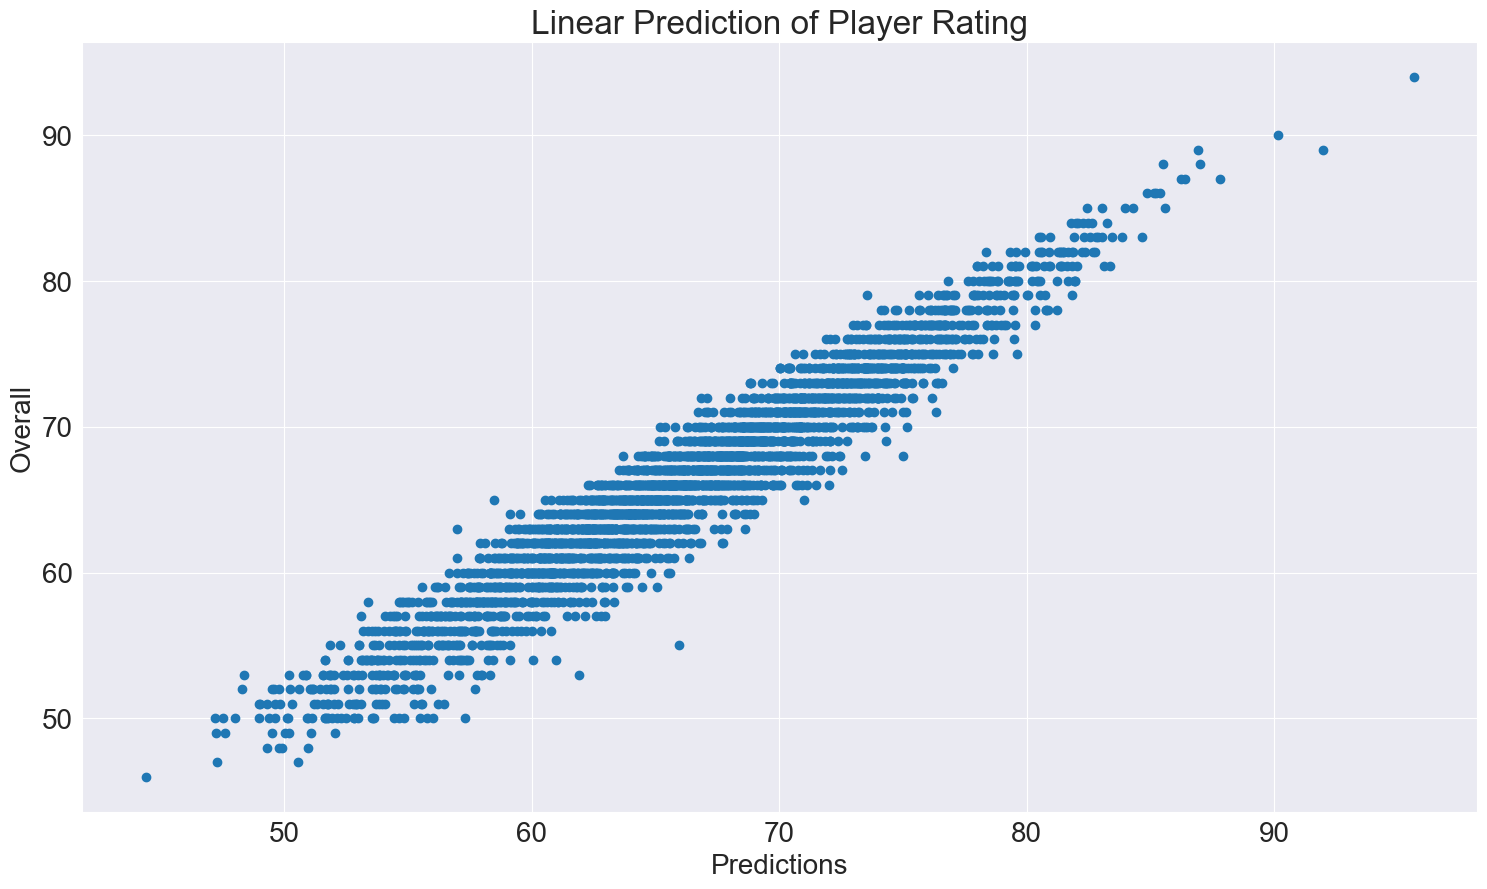

In [133]:
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test)

plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()


### Save the original model

In [134]:
save_model_path = 'D:\Data\AI\Machine Learning\Linear Regression\FIFA Analysis\model'

def save_models(models_dict, save_folder_path, running_count):
  for model in models_dict:
    filename = model['label'] + '_{}.pkl'.format(str(running_count))
    with open(save_model_path + '/' + filename, 'wb') as f:
      pickle.dump(model, f)

In [135]:
save_models(models_dict=[{"label": "LR", "model": model}], save_folder_path=save_model_path, running_count='original')